In [1]:
import pandas as pd
import numpy as np
import os

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [2]:
path = os.path.join(os.getcwd(), '../raw_data')

data_prep = pd.read_csv(os.path.join(path, 'x_train_preprocessed.csv'))
data_prep.head(1)

,Unnamed: 0,summary,positives,negatives,advice_to_mgmt,review,summary_length,postives_length,negatives_length,advice_length,...,subjectivity_summary,polarity_summary,subjectivity_positives,polarity_positives,subjectivity_negatives,polarity_negatives,subjectivity_advice_to_mgmt,polarity_advice_to_mgmt,subjectivity_review,polarity_review
0,0,good job considering retail,apple good company period pay average working ...,job movement lateral extremely difficult get p...,NaN,good job considering retail apple good company...,31,118,127,0,...,0.6,0.7,0.666667,0.516667,1.0,-0.5,0.0,0.0,0.72,0.35


In [3]:
data_prep.shape

(36970, 51)

In [4]:
data_prep.positives.isnull().sum()

1

In [5]:
# only consider positive reviews and drop nan values

positives = data_prep.positives.dropna()
positives.shape

(36969,)

In [6]:
positives

0        apple good company period pay average working ...
1                  good pay smart coworkers good insurance
2        intelligent co worker encouraged innovate good...
3        pay competitive look good resume move around i...
4                                 good salary perk benefit
                               ...                        
36965    working environment google provide allow emplo...
36966    great working diverse people focused company s...
36967    work home great medical benefit decent pay gre...
36968       plenty overtime staff friendly usually helpful
36969    good pay amazing coworkers good hour lot overtime
Name: positives, Length: 36969, dtype: object

In [7]:
# only consider positive reviews and drop nan values

negatives = data_prep.negatives.dropna()
negatives.shape

(36961,)

In [8]:
def print_topics(model, vectorizer):
    for idx, topic in enumerate(model.components_):
        print("Topic %d:" % (idx))
        print([(vectorizer.get_feature_names()[i], topic[i])
                        for i in topic.argsort()[:-10 - 1:-1]])

In [9]:
# topic modelling ngram_range

vectorizer = TfidfVectorizer(ngram_range=(3,3)).fit(positives)

data_vectorized = vectorizer.transform(positives)

lda_model = LatentDirichletAllocation(n_components=3).fit(data_vectorized)

print_topics(lda_model, vectorizer)

Topic 0:
[('great company work', 89.03208899291667), ('work life balance', 53.45132614132383), ('good place work', 53.36111349748615), ('good pay benefit', 32.50685161158105), ('pay great benefit', 28.605671664974572), ('best company work', 28.219344846606578), ('great pay benefit', 27.19697561713223), ('great benefit great', 25.984544548349124), ('good work environment', 21.77152467361772), ('good work life', 21.33700244881601)]
Topic 1:
[('great place work', 105.12691187960107), ('work life balance', 81.94002886478128), ('great people work', 43.66545462998196), ('good work life', 42.88004356386094), ('great people great', 42.134257439340494), ('pay good benefit', 35.515345318537925), ('great benefit good', 34.04998105782115), ('good pay good', 33.05379206683074), ('good benefit good', 30.531202148249374), ('benefit good pay', 27.611047510325925)]
Topic 2:
[('work life balance', 162.1842501062585), ('good company work', 53.673138301452724), ('good work life', 50.108759201861176), ('li

In [10]:
vectorizer = TfidfVectorizer(max_df=0.8, ngram_range=(3,3)).fit(negatives) # words that appear most (top 20%) left out

data_vectorized = vectorizer.transform(negatives)

lda_model = LatentDirichletAllocation(n_components=3).fit(data_vectorized)

print_topics(lda_model, vectorizer)

Topic 0:
[('work life balance', 113.50702385069958), ('none none none', 17.32884230874053), ('nothing bad say', 15.966472891470126), ('life balance great', 15.276956389546806), ('great place work', 12.220735569969095), ('work long hour', 11.45552884165862), ('long hour foot', 10.128037013623379), ('life balance bad', 10.110160028031483), ('long hour work', 9.757781584599536), ('hour work life', 9.495791934054251)]
Topic 1:
[('work life balance', 97.80099493682305), ('con working amazon', 9.615578107186328), ('long working hour', 9.359375003570753), ('long work hour', 9.312724995870475), ('nothing nothing nothing', 9.191215725131853), ('con working apple', 8.666093168321884), ('lack work life', 7.763042907186401), ('none come mind', 7.22935544627148), ('full time position', 7.135128872532656), ('good company work', 6.852532516391493)]
Topic 2:
[('work life balance', 188.48190989610484), ('poor work life', 27.532982153468776), ('life balance good', 15.986554951614256), ('life balance dif

In [12]:
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
import string
from nltk import word_tokenize, pos_tag

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/celinegianduzzo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/celinegianduzzo/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [13]:
def nouns_adj(text):
    '''Given a string of text, tokenize the text and pull out only     the nouns and adjectives.'''
    is_noun_adj = lambda pos: pos[:2] == 'NN' or pos[:2] == 'JJ'
    tokenized = word_tokenize(text)
    nouns_adj = [word for (word, pos) in pos_tag(tokenized) if   is_noun_adj(pos)]
    return ' '.join(nouns_adj)

In [14]:
data_nouns = pd.DataFrame(negatives.apply(nouns_adj))
data_nouns.shape

(36961, 1)

In [15]:
negatives.head()

0    job movement lateral extremely difficult get p...
1    hr protect company employee careful restricted...
2    promote work life balance word employee get re...
3    work life balance hostile environment reward b...
4    hectic schedule u ill learning cutting technology
Name: negatives, dtype: object

In [16]:
vectorizer = TfidfVectorizer(max_df=0.1).fit(data_nouns.negatives) # words that appear most (top 20%) left out

data_vectorized = vectorizer.transform(data_nouns.negatives)

lda_model = LatentDirichletAllocation(n_components=3).fit(data_vectorized)

print_topics(lda_model, vectorizer)

Topic 0:
[('balance', 634.1234750833713), ('nothing', 452.30083688123784), ('none', 378.63524835366655), ('big', 357.58256367598796), ('hard', 319.43566044036106), ('salary', 304.8637092163651), ('lot', 302.75588890426394), ('high', 288.693717405755), ('pressure', 286.5780210814568), ('good', 281.32055522272896)]
Topic 1:
[('con', 727.1266687763382), ('shift', 350.1772800535659), ('day', 337.97622608026666), ('retail', 273.853548382116), ('job', 262.02183049348235), ('pay', 221.56061841797526), ('schedule', 220.4415927388119), ('balance', 217.30536992353848), ('get', 210.60856887390807), ('week', 204.48591848022684)]
Topic 2:
[('manager', 503.2202476797583), ('employee', 411.1256645567782), ('lot', 353.9289299596483), ('much', 277.5140459566265), ('team', 250.35360465701814), ('growth', 236.55823334707694), ('break', 218.64212156733075), ('job', 213.98411089958657), ('process', 210.12186728003263), ('politics', 194.55656179360955)]


In [17]:
tokenized = []
for sentence in negatives:
    tokenized.append(word_tokenize(sentence))
    
tokenized

[['job',
  'movement',
  'lateral',
  'extremely',
  'difficult',
  'get',
  'promoted',
  'competing',
  'coworkers',
  'store'],
 ['hr',
  'protect',
  'company',
  'employee',
  'careful',
  'restricted',
  'stock',
  'unit',
  'awarded',
  'exact',
  'number'],
 ['promote',
  'work',
  'life',
  'balance',
  'word',
  'employee',
  'get',
  'recognized',
  'hand',
  'meeting',
  'worked',
  'hour',
  'week',
  'never',
  'took',
  'time'],
 ['work',
  'life',
  'balance',
  'hostile',
  'environment',
  'reward',
  'bully',
  'limited',
  'development',
  'advancement',
  'option',
  'older',
  'employee',
  'manager',
  'check',
  'balance',
  'get',
  'terminated',
  'made',
  'reason',
  'employment',
  'likely',
  'rsus',
  'vest',
  'hr',
  'support',
  'manager',
  'employee'],
 ['hectic', 'schedule', 'u', 'ill', 'learning', 'cutting', 'technology'],
 ['hard',
  'get',
  'often',
  'turn',
  'away',
  'good',
  'people',
  'left',
  'clear',
  'idea',
  'make'],
 ['always', '

In [19]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

In [20]:
# create id2word
id2word = corpora.Dictionary(tokenized)

# Create Corpus
texts = tokenized

# Creat Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]


In [21]:
ldamallet = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=2, id2word=id2word, iterations=100)

In [22]:
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=texts, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)


Coherence Score:  0.47997955400905257


In [26]:
import pprint as pp
#pp = +(indent=4)

In [27]:
pp.pprint(ldamallet.show_topics(formatted=False))

[(0,
  [('company', 0.01729267),
   ('people', 0.014595355),
   ('management', 0.012130649),
   ('team', 0.010692433),
   ('manager', 0.010557052),
   ('get', 0.008771394),
   ('employee', 0.0072852387),
   ('lot', 0.00678118),
   ('many', 0.0067498256),
   ('good', 0.0062993295)]),
 (1,
  [('work', 0.045819286),
   ('time', 0.019917924),
   ('hour', 0.018675163),
   ('life', 0.014957153),
   ('get', 0.012562376),
   ('balance', 0.012276712),
   ('day', 0.010595937),
   ('long', 0.010181474),
   ('job', 0.008723641),
   ('working', 0.0077630943)])]


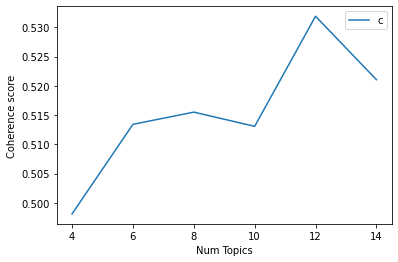

In [28]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=4):
    '''
    Compute coherence for given number of topics

    Parameters:
    
        dictionary : Gensim dictionary
        corpus : Gensim corpus
        texts : List of input texts
        start: minimum number of topics
        limit : Max num of topics
        step: step between topic numbers

    Returns:
    
        model_list : List of LDA topic models
        coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    '''
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=id2word, alpha=.91)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values


# Running the above function. Can take a long time to run!
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=texts, start=4, limit=16, step=2)


# Show graph of LDA coherence scores
# ATTEN: parameters here have to match those of you function to display properly!
limit = 16
start = 4
step = 2
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [29]:
optimal_model = model_list[4]
model_topics = optimal_model.show_topics(formatted=False)
pp.pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.023*"people" + 0.020*"manager" + 0.019*"review" + 0.015*"year" + '
  '0.012*"get" + 0.011*"company" + 0.011*"microsoft" + 0.010*"system" + '
  '0.009*"employee" + 0.009*"performance"'),
 (1,
  '0.051*"long" + 0.044*"hour" + 0.035*"work" + 0.029*"time" + 0.024*"lot" + '
  '0.022*"break" + 0.019*"high" + 0.016*"fast" + 0.014*"management" + '
  '0.013*"poor"'),
 (2,
  '0.041*"company" + 0.027*"’" + 0.017*"employee" + 0.013*"pay" + 0.013*"big" '
  '+ 0.011*"like" + 0.011*"work" + 0.010*"compensation" + 0.009*"amazon" + '
  '0.009*"nothing"'),
 (3,
  '0.041*"work" + 0.022*"level" + 0.021*"much" + 0.018*"politics" + '
  '0.017*"promotion" + 0.016*"role" + 0.016*"manager" + 0.014*"career" + '
  '0.013*"employee" + 0.012*"environment"'),
 (4,
  '0.037*"retail" + 0.033*"customer" + 0.024*"store" + 0.019*"time" + '
  '0.019*"apple" + 0.014*"working" + 0.013*"opportunity" + 0.013*"sale" + '
  '0.013*"corporate" + 0.012*"work"'),
 (5,
  '0.035*"company" + 0.029*"con" + 0.024*"good" + 0.0

In [30]:
import pyLDAvis
import pyLDAvis.gensim

In [31]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(optimal_model, corpus, dictionary=optimal_model.id2word)
vis

/Users/celinegianduzzo/.pyenv/versions/3.7.7/envs/492_sentiment_monitoring/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9      0.150145 -0.098547       1        1  13.517354
0      0.003096 -0.155443       2        1  12.028851
6      0.188739  0.001436       3        1  10.214228
7     -0.105162 -0.058968       4        1   8.648927
3     -0.099349 -0.002620       5        1   7.473219
2     -0.035462 -0.027583       6        1   7.242138
11    -0.152517  0.033795       7        1   6.956293
4      0.017061  0.044969       8        1   6.928568
8      0.042059  0.028176       9        1   6.785315
10     0.001253  0.069348      10        1   6.745805
1      0.059198  0.172366      11        1   6.740780
5     -0.069061 -0.006929      12        1   6.718524, topic_info=        Term          Freq         Total Category  logprob  loglift
33      work  14498.000000  14498.000000  Default  30.0000  30.0000
24      life   4090.000000   4090.000000  Default  29.0000  29.0000
21   balance   3344.000000   3344.000000  Default  28.0000  28.0000
23      hour   4934.000000   4934.000000  Default  27.0000  27.0000
116     long   3015.000000   3015.000000  Default  26.0000  26.0000
..       ...           ...           ...      ...      ...      ...
64      hard    259.782358   3393.123341  Topic12  -5.0689   0.1306
548      lot    265.233698   4168.911069  Topic12  -5.0482  -0.0545
127   really    223.730093   2337.975051  Topic12  -5.2183   0.3537
124      bad    216.109358   1934.329009  Topic12  -5.2530   0.5086
313  process    205.260131   1942.331303  Topic12  -5.3045   0.4529

[983 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
3651      4  0.983709    abundance
4883      1  0.922569  accountable
4883      2  0.040702  accountable
4883      9  0.013567  accountable
1801      7  0.039360      acquire
...     ...       ...          ...
1329      3  0.004004            “
1329      6  0.984870            “
1330      1  0.008007            ”
1330      3  0.004004            ”
1330      6  0.984901            ”

[4627 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 1, 7, 8, 4, 3, 12, 5, 9, 11, 2, 6])

In [33]:
pyLDAvis.save_html(vis, 'lda.html')

/Users/celinegianduzzo/.pyenv/versions/3.7.7/envs/492_sentiment_monitoring/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
